<a href="https://colab.research.google.com/github/Larasati11/machine-learning/blob/main/Tugas_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota Kelompok :

1. Larasati Puspita Candra Dewi NIM. 2241720104

2. Rizky Arifiansyah NIM. 2241720157

3. Zaki Lauzardi Ferysa Putra NIM. 2241720101

4. Syahrul Bhudi Feriansyah NIM. 2241720167

# Tugas ANN

## Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Penjelasan : Program diatas mengimpor pustaka atau library yang diperlukan untuk membangun, melatih, dan mengevaluasi model neural network menggunakan TensorFlow dan Keras, dengan dataset MNIST. TensorFlow digunakan untuk deep learning, Keras untuk membuat model jaringan saraf, NumPy untuk komputasi numerik, dan Matplotlib serta Seaborn untuk visualisasi hasil pelatihan. Selain itu, Scikit-learn digunakan untuk evaluasi kinerja model dengan matriks kebingungan.

## Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# One-hot encoding untuk label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 4s 0us/step


Penjelasan : Kode program diatas memuat dataset MNIST dan mempersiapkannya untuk digunakan dalam model machine learning. Pertama, data gambar dibagi menjadi data latih (`x_train`, `y_train`) dan data uji (`x_test`, `y_test`). Kemudian, data gambar yang awalnya memiliki nilai piksel antara 0 hingga 255 dinormalisasi menjadi rentang 0 hingga 1 dengan mengubah tipe datanya menjadi float32 dan membaginya dengan 255. Setelah itu, gambar 2D (28x28 piksel) diratakan menjadi vektor 1D dengan panjang 784 (28*28). Terakhir, label digit (0-9) diubah menjadi representasi one-hot encoding agar bisa digunakan dalam model klasifikasi dengan 10 kelas.

### Buat Model

In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2024-10-21 15:10:58.214948: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-21 15:10:58.215605: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-21 15:11:04.486381: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-21 15:11:04.486421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-10-21 15:11:04.487218: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024

Penjelasan : Kode program diatas membuat dan mengonfigurasi neural network dengan menggunakan API Keras Sequential. Model terdiri dari tiga lapisan fully connected: lapisan pertama memiliki 128 neuron dengan aktivasi ReLU dan input berupa vektor 784 (gambar 28x28 yang diratakan), diikuti lapisan dropout 20% untuk mencegah overfitting. Lapisan kedua memiliki 64 neuron dengan aktivasi ReLU, juga diikuti oleh dropout 20%. Lapisan terakhir adalah lapisan output dengan 10 neuron dan aktivasi softmax untuk klasifikasi 10 kelas (digit 0-9). Model dikompilasi menggunakan optimizer Adam, fungsi loss categorical crossentropy untuk klasifikasi multi-kelas, dan metrik akurasi. Akhirnya, model ditampilkan menggunakan `model.summary()` untuk merangkum arsitekturnya.

### Fit Model

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    verbose=1)

2024-10-21 15:11:25.765226: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.
2024-10-21 15:11:25.971937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-10-21 15:11:25.972247: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3194105000 Hz


Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 0.8019 - accuracy: 0.7511 - val_loss: 0.1605 - val_accuracy: 0.9518
Epoch 2/20
422/422 [==============================] - 1s 1ms/step - loss: 0.2274 - accuracy: 0.9342 - val_loss: 0.1129 - val_accuracy: 0.9660
Epoch 3/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1670 - accuracy: 0.9497 - val_loss: 0.0928 - val_accuracy: 0.9742
Epoch 4/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1301 - accuracy: 0.9596 - val_loss: 0.0831 - val_accuracy: 0.9752
Epoch 5/20
422/422 [==============================] - 1s 1ms/step - loss: 0.1140 - accuracy: 0.9655 - val_loss: 0.0751 - val_accuracy: 0.9780
Epoch 6/20
422/422 [==============================] - 1s 1ms/step - loss: 0.0976 - accuracy: 0.9700 - val_loss: 0.0703 - val_accuracy: 0.9778
Epoch 7/20
422/422 [==============================] - 1s 1ms/step - loss: 0.0865 - accuracy: 0.9719 - val_loss: 0.0764 - val_accuracy: 0.9785
Epoch 

Penjelasan : Kode program di atas melatih model neural network menggunakan data latih (`x_train`, `y_train`) dengan fungsi `fit`. Model dilatih selama 20 epoch, dengan ukuran batch 128, yang berarti data akan diproses dalam kelompok-kelompok berisi 128 sampel. Sebanyak 10% dari data latih digunakan sebagai data validasi (`validation_split=0.1`) untuk memantau kinerja model pada data yang tidak digunakan selama pelatihan. Parameter `verbose=1` mengatur tampilan proses pelatihan di layar. Hasil pelatihan, termasuk metrik seperti akurasi dan nilai loss untuk data latih dan validasi, disimpan dalam variabel `history`.

### Evaluasi Model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9823


Penjelasan : Kode program di atas mengevaluasi performa model neural network yang telah dilatih menggunakan data uji (`x_test`, `y_test`) dengan fungsi `evaluate`. Fungsi ini mengembalikan dua nilai: *test_loss* (nilai loss pada data uji) dan *test_accuracy* (akurasi pada data uji). Parameter `verbose=0` berarti proses evaluasi tidak akan menampilkan output secara rinci. Setelah evaluasi selesai, hasil akurasi uji dicetak ke layar dengan format empat angka desimal menggunakan perintah `print(f"Test accuracy: {test_accuracy:.4f}")`.

### Confusion Matrix

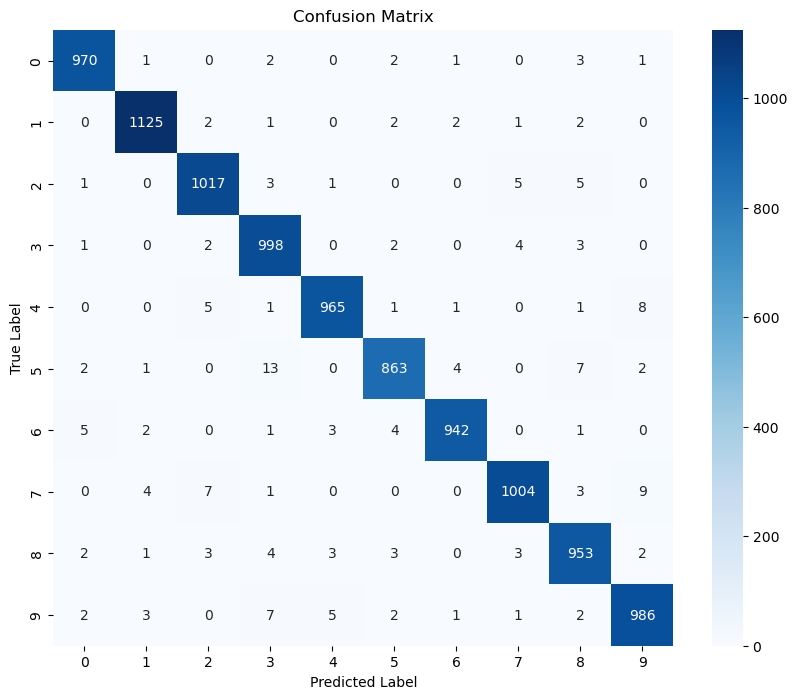

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Penjelasan : Kode program di atas melakukan prediksi terhadap data uji (`x_test`) menggunakan model yang sudah dilatih, dengan hasil prediksi disimpan dalam variabel `y_pred`. Nilai prediksi berbentuk probabilitas untuk setiap kelas, sehingga `np.argmax` digunakan untuk mendapatkan kelas dengan probabilitas tertinggi sebagai prediksi akhir (`y_pred_classes`). Demikian juga, nilai sebenarnya dari label data uji (`y_test`) dikonversi dari one-hot encoding menjadi label asli (`y_true`). Selanjutnya, matriks kebingungan (*confusion matrix*) dihitung menggunakan fungsi `confusion_matrix` untuk membandingkan label sebenarnya dan prediksi. Matriks ini divisualisasikan menggunakan heatmap dari Seaborn, di mana anotasi angka di setiap kotak menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

## Visualisasi Hasil

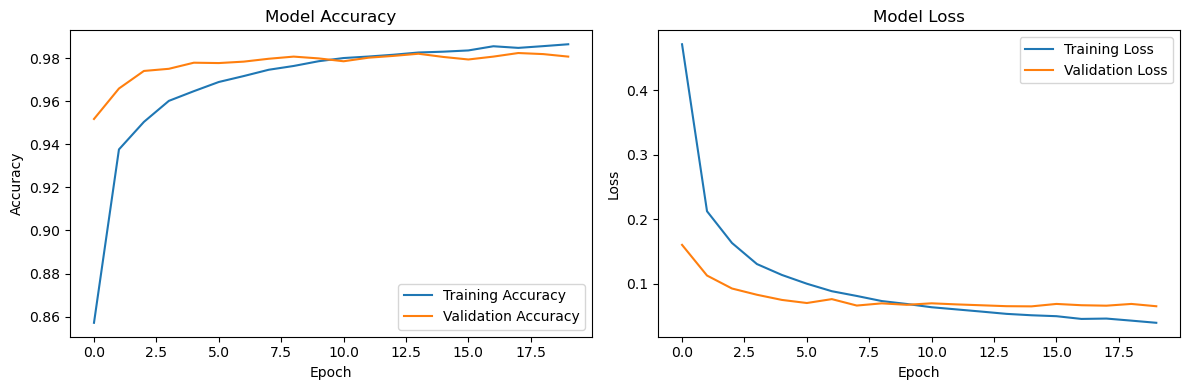

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Penjelasan : Kode program diatas memvisualisasikan hasil pelatihan model neural network dengan membuat dua plot: akurasi dan loss (nilai error) selama pelatihan. Pertama, sebuah figure dengan ukuran 12x4 inci dibuat. Plot pertama (subplot kiri) menampilkan grafik perubahan akurasi untuk data latih dan validasi selama beberapa epoch, dengan sumbu x sebagai epoch dan sumbu y sebagai akurasi. Plot kedua (subplot kanan) menunjukkan perubahan nilai loss untuk data latih dan validasi, dengan sumbu x sebagai epoch dan sumbu y sebagai nilai loss. Keduanya menggunakan data yang disimpan di dalam `history.history` selama pelatihan. Fungsi `tight_layout()` digunakan untuk mengatur tata letak agar rapi, dan akhirnya grafik ditampilkan menggunakan `plt.show()`.